In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



Исходный файл: 230400 строк
Новый файл: 130032 строк
Удалено строк: 100368
Сохранено в файл: spectrum_7x3_3a_filtered.dat


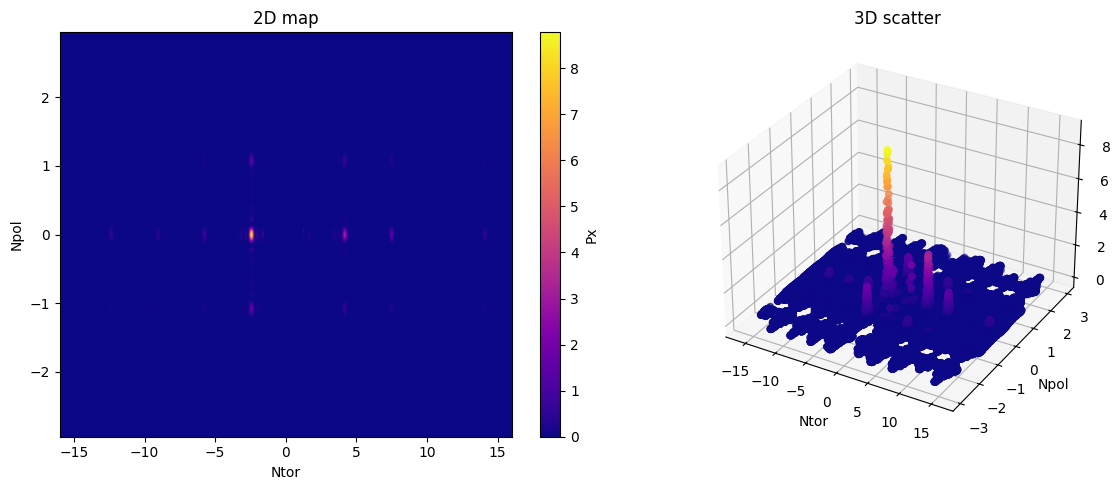

In [15]:
# Замените 'your_file.dat' на имя вашего файла
data = np.loadtxt('spectrum_7x3_3a.dat')

Ntor = data[:, 0]
Npol = data[:, 1]
Px = data[:, 2]

mask = Px >= 1e-6

# Применяем маску ко всем данным
data_filtered = data[mask]

# Обновляем переменные с отфильтрованными данными
Ntor = data_filtered[:, 0]
Npol = data_filtered[:, 1]
Px = data_filtered[:, 2]

np.savetxt('spectrum_7x3_3a_filtered.dat', data_filtered, 
           delimiter=' ') 

print(f"Исходный файл: {len(data)} строк")
print(f"Новый файл: {len(data_filtered)} строк")
print(f"Удалено строк: {len(data) - len(data_filtered)}")
print(f"Сохранено в файл: spectrum_7x3_3a_filtered.dat")

# Для 2D-графика
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# Создаем сетку для 2D-графика
xi = np.unique(Ntor)
yi = np.unique(Npol)
Xi, Yi = np.meshgrid(xi, yi)
Zi = np.zeros_like(Xi)

for i in range(len(Ntor)):
    x_idx = np.where(xi == Ntor[i])[0][0]
    y_idx = np.where(yi == Npol[i])[0][0]
    Zi[y_idx, x_idx] = Px[i]

plt.imshow(Zi, extent=[xi.min(), xi.max(), yi.min(), yi.max()],
           origin='lower', aspect='auto', cmap='plasma')
plt.xlabel('Ntor')
plt.ylabel('Npol')
plt.title('2D map')
plt.colorbar(label='Px')

# Для 3D-графика
ax = plt.subplot(1, 2, 2, projection='3d')
ax.scatter(Ntor, Npol, Px, c=Px, cmap='plasma')
ax.set_xlabel('Ntor')
ax.set_ylabel('Npol')
ax.set_zlabel('Px')
ax.set_title('3D scatter')

plt.tight_layout()
plt.show()

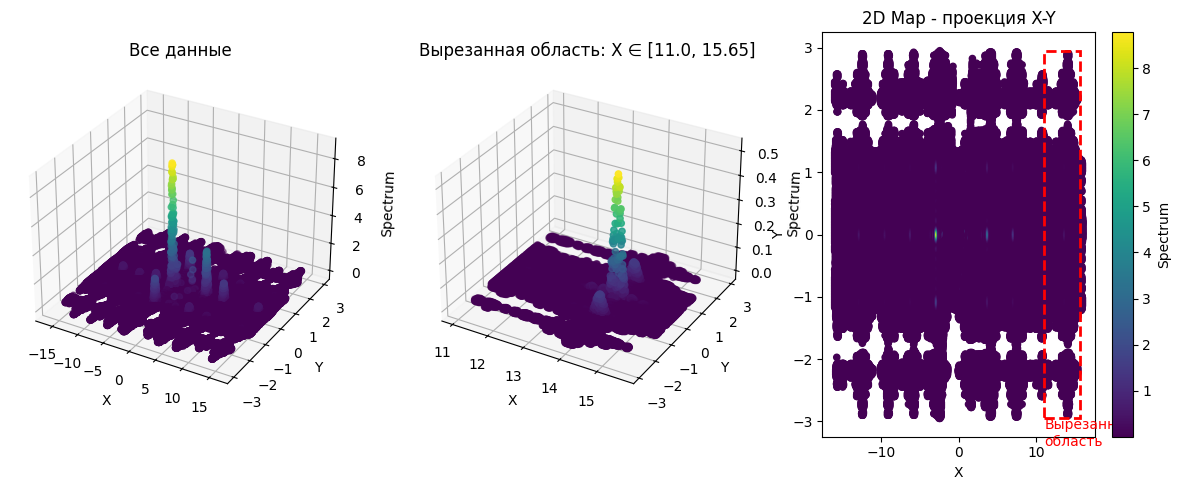

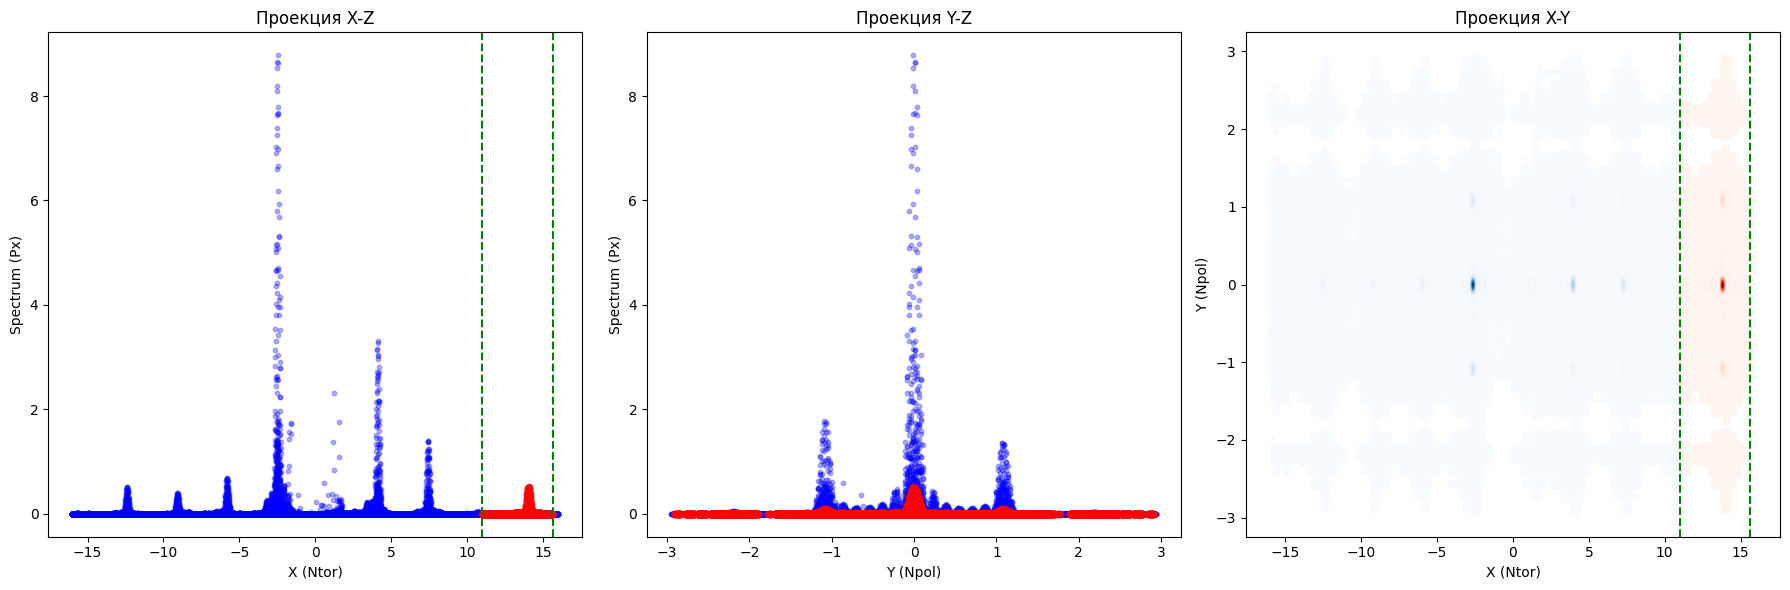

In [ ]:
data = np.loadtxt('spectrum_7x3_3a_filtered.dat')

if data.ndim == 2 and data.shape[1] >= 3:
    x = data[:, 0]  # первая координата
    y = data[:, 1]  # вторая координата  
    z = data[:, 2]  # значение спектра

    # Вырезаем область по X 
    x_min, x_max = 11.0, 15.65
    mask_cut = (x >= x_min) & (x <= x_max)
    
    # Применяем маску
    data_cut = data[mask_cut]
    x_cut = data_cut[:, 0]
    y_cut = data_cut[:, 1]
    z_cut = data_cut[:, 2]

xi = np.unique(x)
yi = np.unique(y)
Xi, Yi = np.meshgrid(xi, yi)
Zi = np.zeros_like(Xi)

for i in range(len(x)):
    x_idx = np.where(xi == x[i])[0][0]
    y_idx = np.where(yi == y[i])[0][0]
    Zi[y_idx, x_idx] = Px[i] 

# Визуализация
fig = plt.figure(figsize=(12, 5))

# Полные данные
ax1 = fig.add_subplot(131, projection='3d')
sc1 = ax1.scatter(x, y, z, c=z, cmap='viridis')
ax1.set_title('Все данные')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Spectrum')

# Вырезанная область
ax2 = fig.add_subplot(132, projection='3d')
sc2 = ax2.scatter(x_cut, y_cut, z_cut, c=z_cut, cmap='viridis')
ax2.set_title(f'Вырезанная область: X ∈ [{x_min}, {x_max}]')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Spectrum')

# 2D карта
ax3 = fig.add_subplot(133)
sc3 = ax3.scatter(x, y, c=z, cmap='viridis', s=20)
ax3.set_title('2D Map - проекция X-Y')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
plt.colorbar(sc3, ax=ax3, label='Spectrum')


import matplotlib.patches as patches
rect = patches.Rectangle((x_min, y.min()), x_max - x_min, y.max() - y.min(),
                        linewidth=2, edgecolor='red', facecolor='none', linestyle='--')
ax3.add_patch(rect)
ax3.text(x_min, y.min(), 'Вырезанная\nобласть', color='red', va='top')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Проекция X-Z
axes[0].scatter(x[~mask_cut], z[~mask_cut], c='blue', alpha=0.3, s=10)
axes[0].scatter(x[mask_cut], z[mask_cut], c='red', alpha=0.8, s=20)
axes[0].set_xlabel('X (Ntor)')
axes[0].set_ylabel('Spectrum (Px)')
axes[0].set_title('Проекция X-Z')
axes[0].axvline(x=x_min, color='green', linestyle='--')
axes[0].axvline(x=x_max, color='green', linestyle='--')

# Проекция Y-Z
axes[1].scatter(y[~mask_cut], z[~mask_cut], c='blue', alpha=0.3, s=10)
axes[1].scatter(y[mask_cut], z[mask_cut], c='red', alpha=0.8, s=20)
axes[1].set_xlabel('Y (Npol)')
axes[1].set_ylabel('Spectrum (Px)')
axes[1].set_title('Проекция Y-Z')

# Проекция X-Y
sc1 = axes[2].scatter(x[~mask_cut], y[~mask_cut], c=z[~mask_cut], 
                     cmap='Blues', alpha=0.5, s=10)
sc2 = axes[2].scatter(x[mask_cut], y[mask_cut], c=z[mask_cut], 
                     cmap='Reds', alpha=0.8, s=20)
axes[2].set_xlabel('X (Ntor)')
axes[2].set_ylabel('Y (Npol)')
axes[2].set_title('Проекция X-Y')
axes[2].axvline(x=x_min, color='green', linestyle='--')
axes[2].axvline(x=x_max, color='green', linestyle='--')



plt.tight_layout()
plt.show()
